# theory part

Sometimes we got confuse in selecting machine learning models to solve a problem for example we worked on iris flower data set problem, so we can classify those iris flowers using svm, random forest, logistic regression, decision tree. Which model out of these is the best.

Cross validation is a technique which allows us to answer the exact same question, basically it allows us to evaluate a model performance when we look an ml model such as classifying  emails are spam or not spam as shown:

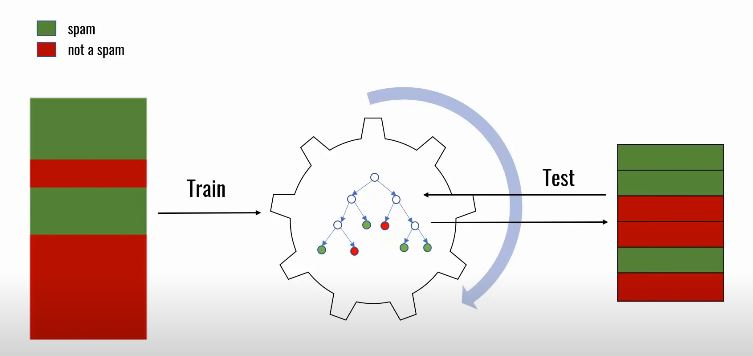

Our typical procedure is that we first train the model using whatever dataset label that we have and once the model is built the next step is to use different dataset for testing your model and your model will basically return the results back and then those results you can compare with the truth to measure the accuracy of a model.

Now there are several ways we can perform this training step:

1. The 1st option is that all the training dataset that you have available you just feed that to your model i-e 100% of the samples to train the model and then use the same exact sample to test the model. This in real life can be compared to an example of preparing a kid for a mathematics test. Lets say we have 100 maths question, you train this kid for those questions and then when he goes for the exams, you ask the exact same questions and then you try to measure his math skill based on the score. This is not a very good way of measuring someone's maths skills becuase he has already seen those questions before so what if he gets 100/100, so there is no point because he has already seen that.
2. The 2nd option we have is that we split the samples that we have available into training and test dataset so for example here:

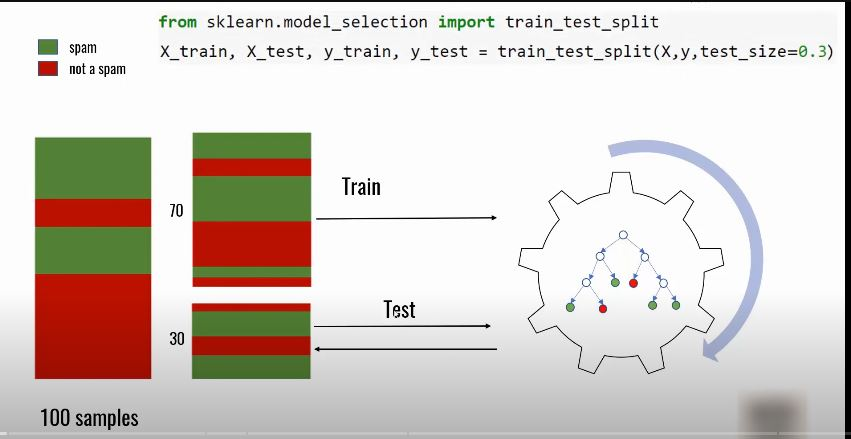

out of 100 I will use 70 for training and 30 for testing and we have been using this train test split method as shown in figure in all of our supervised learning model training.

So now lets again move to the kid student example, you can give this kid 70 math question for preparation(training) and the remaining 30 you will reserve for the test (testing) so that way if he goes for the test in 30 questions that he has not seen these 30 questions which is good that way you can measure the skills in a good way but there is one problem with this approach also lets say 70 questions that you give this kid assume they were all algebra and now remaining 30 questions are from calculus so now those questions he has not seen before then he might not perform well so thi technique is like it kind of works that is fine but not perfect for that reason we have 3rd option.

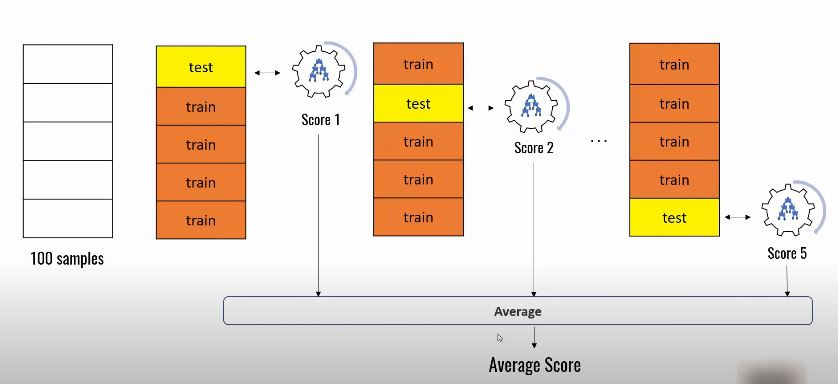

3. The 3rd option we have is k fold cross validation. In this technique what we do is that we divide our 100 samples into folds so assume that we have 5 folds like as shown in which each box contain 20 samples and then you run multiple iteration the first iteration you use fold no.2-5 for training the model and the 1st fold for testing the model and you note down the score. In the 2nd iteration you use first 4 and then 3-5 for training and 2nd one for testing and then again note down the score. You repeat the process till the last fold when you use fold no.5 for tesing and remaining for training and once you have all the scores you can find their average.

This technique is very very good because you are giving variety of samples to your models and then you are taking individuals scores and then averaging them out.

# Coding part

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

In [38]:
# classifiers
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.9703703703703703

In [39]:
svm = SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9925925925925926

In [40]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9703703703703703

In [41]:
# problem with train test split method is that the score changes every time you re-execute the code

In [43]:
# k-fold api

In [44]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [45]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [48]:
# in this code piece the in will return an iterator kf.split([1,2,3,4,5,6,7,8,9]) and this iterator will return this
# print(train_index, test_index) for each of the iteration  and then it divide the kf.split into 3 folds and 
# the 1st iteration it used one fold for testing which is 0 1 2 and remaining 2 folds for training which is this [3 4 5 6 7 8]

In [ ]:
# a simple example of kfold

In [49]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [51]:
get_score(LogisticRegression(max_iter=200),X_train, X_test, y_train, y_test)

0.9703703703703703

In [52]:
get_score(SVC(),X_train, X_test, y_train, y_test)

0.9925925925925926

In [53]:
get_score(RandomForestClassifier(n_estimators=40),X_train, X_test, y_train, y_test)

0.9685185185185186

In [54]:
# For digit dataset
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)
folds

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [55]:
# kfold and stratifiedkfold are same

In [73]:
scores_l = []
scores_svm = []
scores_rf = []


for train_index, test_index in kf.split(digits.data):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                        digits.target[train_index], digits.target[test_index]
    scores_l.append(get_score(LogisticRegression(max_iter=200), X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [80]:
scores_l

[0.9248747913188647, 0.9432387312186978, 0.9148580968280468]

In [79]:
scores_svm

[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]

In [78]:
scores_rf

[0.9298831385642737, 0.9465776293823038, 0.9332220367278798]

In [81]:
# code of k_fold for real life

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
cross_val_score(LogisticRegression(max_iter=200), digits.data, digits.target)

array([0.92222222, 0.87222222, 0.94150418, 0.93871866, 0.89693593])

In [84]:
cross_val_score(SVC(), digits.data, digits.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [86]:
cross_val_score(RandomForestClassifier(n_estimators=40), digits.data, digits.target)

array([0.93055556, 0.91666667, 0.94707521, 0.95543175, 0.93593315])